Train MSE for model ord=3, alpha=0.003, iter=60000 is 0.195102132515
Test MSE for model ord=3, alpha=0.003, iter=60000 is 0.257593254357
Train MSE for model ord=5, alpha=0.002, iter=90000 is 0.180988131464
Test MSE for model ord=5, alpha=0.002, iter=90000 is 0.294488389941
Train MSE for model ord=7, alpha=0.001, iter=200000 is 0.0497836994358
Test MSE for model ord=7, alpha=0.001, iter=200000 is 0.0671271417709


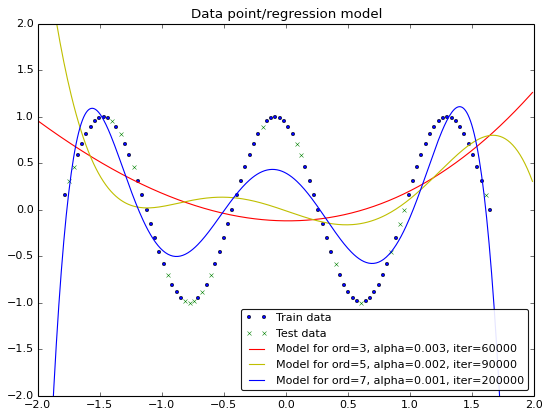

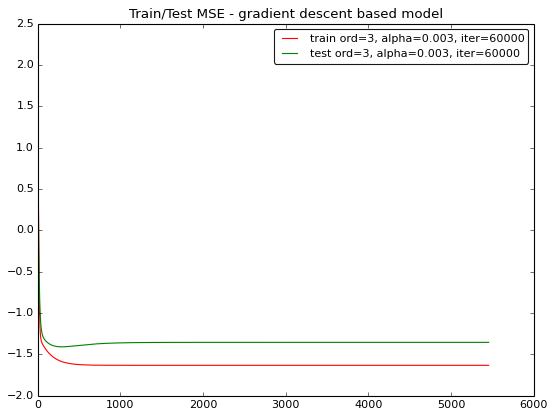

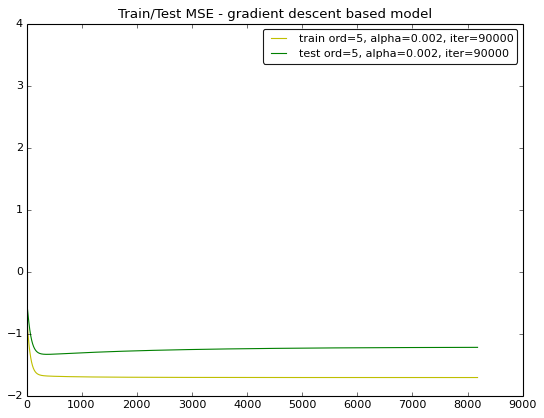

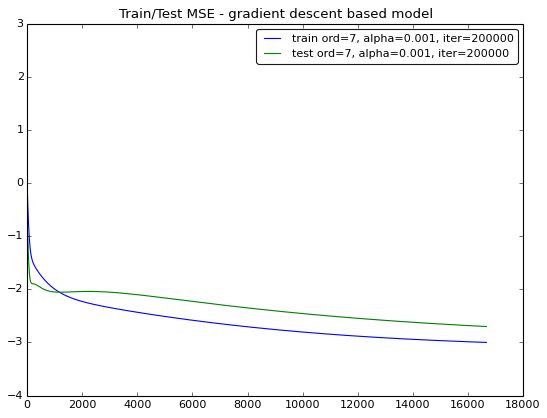

In [5]:
from base.gd import GradientDescentRegression
from data import data
import matplotlib
import numpy as np

# change this to your own backend
matplotlib.interactive(False)
import matplotlib.pyplot as plt
% matplotlib inline


def plot_data_point(X_train, y_train, X_test, y_test):
    plt.figure(2,figsize=(8,6), dpi= 80, facecolor='w', edgecolor='k')
    plt.ylim([-2,2])
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot(X_train, y_train, 'o', ms=3, label='Train data')
    plt.plot(X_test, y_test, 'x', ms=3, label='Test data')
    plt.title('Data point/regression model')


def plot_regression_model(model, fmt):
    plt.figure(2)
    plt.ylim([-2,2])
    X = np.arange(-2, 2, 0.01)
    y = model.predict(X)
    plt.plot(X, y, fmt, label='Model for ' + model.description())
    plt.legend(fancybox=True, loc='lower right', framealpha=0.9, prop={'size': 10})


def plot_mse(model, mse,fig, fmt, color):
    plt.figure(3+fig,figsize=(8,6), dpi= 80, facecolor='w', edgecolor='k')
    plt.plot(np.log(mse[0]), fmt, c=color, ms=5, label='train '+model.description())
    plt.plot(np.log(mse[1]), fmt, c='g', ms=5, label='test '+model.description())
    
    print "Train MSE for model", model.description(), "is", mse[0][-1]
    print "Test MSE for model", model.description(), "is", mse[1][-1]
    plt.xlabel("log(iterations)")
    plt.ylabel("log(mse)")
    plt.legend(fancybox=True, loc='upper right', framealpha=0.9, prop={'size': 10})
    plt.title('Train/Test MSE - gradient descent based model')



if __name__ == '__main__':
    X_train, y_train, X_test, y_test = data.load(train_coefficient=0.2, normalize=True)
    plt.figure()

    model3 = GradientDescentRegression(order=3, alpha=0.003)
    model5 = GradientDescentRegression(order=5, alpha=0.002)
    model7 = GradientDescentRegression(order=7, alpha=0.001)

    plot_data_point(X_train, y_train, X_test, y_test)
    mse3 = model3.fit(X_train, y_train, X_test, y_test, 60000)
    mse5 = model5.fit(X_train, y_train, X_test, y_test, 90000)
    mse7 = model7.fit(X_train, y_train, X_test, y_test, 200000)

    # Check if a plot is to be made for the entered alpha
    plot_regression_model(model3, 'r')
    plot_regression_model(model5, 'y')
    plot_regression_model(model7, 'b')

    # plot train mse,
    plot_mse(model3, mse3,1, '-', 'r')
    plot_mse(model5, mse5,2, '-', 'y')
    plot_mse(model7, mse7,3, '-', 'b')

    # Return the result in pre-defined format
    plt.show()